# MNIST with Estimator API (LinearRegression)

## most of the code taken from the course: Complete Guide to TensorFlow for Deep Learning with Python

##### first get the MNIST data in the csv format (taken from https://pjreddie.com/projects/mnist-in-csv/ ). But this file has problems with the column names, so you need to edit the file in excel (manualy change column names to : label, pix0, pix1, ... , pix678). Please note that, the conversion to csv code in the website is "not" working

##### Info about steps vs num_epochs in tensorflow, https://stackoverflow.com/questions/42816124/steps-vs-num-epochs-in-tensorflow-getting-started-tutorial

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mnist_train = pd.read_csv('mnist_train_modified_in_excel.csv')
mnist_test = pd.read_csv('mnist_test_modified_in_excel.csv')

In [2]:
BATCH_SIZE=30
TEST_BATCH_SIZE=1000
NORMAL_LAYER_SIZE=100

In [3]:
mnist_test.head() # checking the test data

,label,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,...,pix774,pix775,pix776,pix777,pix778,pix779,pix780,pix781,pix782,pix783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_train.head() # checking the training data

,label,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,...,pix774,pix775,pix776,pix777,pix778,pix779,pix780,pix781,pix782,pix783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train=mnist_train.drop('label', axis=1)
x_train = x_train.apply(lambda x: x/255.) # normalizing the 8 bit pixel values
x_train.iloc[0].max() #checking the max value in row 1

1.0

In [6]:
x_test=mnist_test.drop('label', axis=1)
x_test = x_test.apply(lambda x: x/255.) # normalizing the 8 bit pixel values
x_test.iloc[0].max() #checking the max value in row 1

1.0

In [7]:
y_train_int=mnist_train['label']
y_test_int=mnist_test['label']
# now y_test and y_train is not one hot encoded yet

#### checking a random image

this is a: 
1


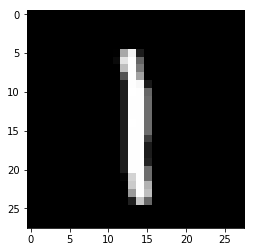

In [8]:
random_checker=np.random.randint(100, size=1)
single_image=x_train.iloc[random_checker].values.reshape(28,28)
plt.imshow(single_image, cmap="gist_gray")
print("this is a: ")
image_prop = y_train_int.values[random_checker]
print(image_prop[0])

In [9]:
#### one hot encoding on y data

In [10]:
y_train=pd.get_dummies(y_train_int)
y_test=pd.get_dummies(y_test_int)
y_train.head()
# now x_train, x_test, y_train, y_test are all ready

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [11]:
# HELPER FUNCTIONS

In [12]:
# INIT WEIGHTS

In [13]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [14]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [15]:
# CONV2D

In [16]:
def conv2d(x,W):
    # x ---> [batch, H, W, Channels]
    # W ---> [filter H, filter W, Channels IN, Channels Out]
    return tf.nn.conv2d(x,W,strides=[1,1,1,1], padding="SAME")

In [17]:
# POOLING

In [18]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

In [19]:
# CONVOLUTIONAL LAYER

In [20]:
def convolutional_layer(input_x, shape):  
    W=init_weights(shape)
    b=init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W)+b)

In [21]:
# FULLY CONNECTED NORMAL LAYER

In [22]:
def normal_full_layer(input_layer,size):
    input_size=int(input_layer.get_shape()[1])
    W=init_weights([input_size,size])
    b=init_bias([size])
    return tf.matmul(input_layer,W)+b

In [23]:
# PLACEHOLDERS

In [24]:
x=tf.placeholder(tf.float32, shape=[None,784])

In [25]:
y_true=tf.placeholder(tf.float32, shape=[None,10])

In [26]:
# LAYERS

In [27]:
x_image=tf.reshape(x,[-1,28,28,1])

In [28]:
convo_1 = convolutional_layer(x_image, shape=[5,5,1,32])

In [29]:
convo_1_pooling = max_pool_2by2(convo_1)

In [30]:
convo_2 = convolutional_layer(convo_1_pooling, shape=[5,5,32,64])

In [31]:
convo_2_pooling = max_pool_2by2(convo_2)

In [32]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])

In [33]:
normal_layer_1 = tf.nn.relu(normal_full_layer(convo_2_flat, NORMAL_LAYER_SIZE))

In [34]:
# DROP OUT

In [35]:
hold_prob = tf.placeholder(tf.float32)
normal_layer_1_dropout = tf.nn.dropout(normal_layer_1, keep_prob=hold_prob)

In [36]:
y_pred = normal_full_layer(normal_layer_1_dropout,10)

In [37]:
# LOSS FUNCTION

In [38]:
cross_entrophy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

In [39]:
# OPTIMIZER

In [40]:
optimizer= tf.train.AdamOptimizer(learning_rate=0.001)

In [41]:
train = optimizer.minimize(cross_entrophy)

In [42]:
init = tf.global_variables_initializer()

In [43]:
matches = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
acc = tf.reduce_mean(tf.cast(matches,tf.float32))

In [44]:
steps = 5000

In [45]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_array = np.random.randint(x_train.shape[0], size=(BATCH_SIZE))
        x_train_batch=x_train.take(batch_array)
        y_train_batch=y_train.take(batch_array)
        sess.run(train, feed_dict={x:x_train_batch, y_true: y_train_batch, hold_prob:0.5})
        if i%100 == 0:
            print("ON STEP: ", end=" ")
            print(i)
            test_batch_array = np.random.randint(x_test.shape[0], size=(TEST_BATCH_SIZE))
            x_test_batch=x_test.take(test_batch_array)
            y_test_batch=y_test.take(test_batch_array)
            print("ACCURACY ON TEST DATA: ", end=" ")
            print(sess.run(acc,feed_dict={x:x_test_batch, y_true: y_test_batch, hold_prob:1}))
            print("\n")

ON STEP:  0
ACCURACY ON TEST DATA:  0.092


ON STEP:  100
ACCURACY ON TEST DATA:  0.905


ON STEP:  200
ACCURACY ON TEST DATA:  0.925


ON STEP:  300
ACCURACY ON TEST DATA:  0.96


ON STEP:  400
ACCURACY ON TEST DATA:  0.951


ON STEP:  500
ACCURACY ON TEST DATA:  0.964


ON STEP:  600
ACCURACY ON TEST DATA:  0.962


ON STEP:  700
ACCURACY ON TEST DATA:  0.977


ON STEP:  800
ACCURACY ON TEST DATA:  0.973


ON STEP:  900
ACCURACY ON TEST DATA:  0.97


ON STEP:  1000
ACCURACY ON TEST DATA:  0.974


ON STEP:  1100
ACCURACY ON TEST DATA:  0.974


ON STEP:  1200
ACCURACY ON TEST DATA:  0.974


ON STEP:  1300
ACCURACY ON TEST DATA:  0.982


ON STEP:  1400
ACCURACY ON TEST DATA:  0.976


ON STEP:  1500
ACCURACY ON TEST DATA:  0.979


ON STEP:  1600
ACCURACY ON TEST DATA:  0.976


ON STEP:  1700
ACCURACY ON TEST DATA:  0.981


ON STEP:  1800
ACCURACY ON TEST DATA:  0.985


ON STEP:  1900
ACCURACY ON TEST DATA:  0.982


ON STEP:  2000
ACCURACY ON TEST DATA:  0.986


ON STEP:  2100
ACCURACY ON 